References for map plot:

Interactive map plots with Plotly: https://towardsdatascience.com/how-to-create-interactive-map-plots-with-plotly-7b57e889239a

Changed the dataset; customized layout, different color for data analysis and visualization; added different ways of interaction

Mapbox Choropleth Maps in Python: https://plot.ly/python/mapbox-county-choropleth/

Adapted layers from the code

In [15]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
import pandas as pd
import numpy as np

# setting user, api key and access token
plotly.tools.set_credentials_file(username='WendyLiang', api_key='0Mqn1LRKjujs81acpAGt')
mapbox_access_token = 'pk.eyJ1Ijoid2VuZHlsaWFuZyIsImEiOiJjandhZGVzd3cwOHU0NGFuMHBzdHJvNHdhIn0.15zho30YkMBcHvlAVx4J9w'

# load data
df = pd.read_csv('./data/degree_map_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5763 entries, 0 to 5762
Data columns (total 8 columns):
Language                 5763 non-null object
Level of Endangerment    5763 non-null object
Number of Speakers       5580 non-null object
Linguistic Family        5763 non-null object
Countries                5763 non-null object
Coordinates              5763 non-null object
Latitude                 5760 non-null float64
Longitude                5760 non-null object
dtypes: float64(1), object(7)
memory usage: 360.3+ KB


In [16]:
# drop rows with no coordinate info
df = df[pd.notnull(df['Latitude'])]
df = df[pd.notnull(df['Countries'])]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5760 entries, 0 to 5762
Data columns (total 8 columns):
Language                 5760 non-null object
Level of Endangerment    5760 non-null object
Number of Speakers       5577 non-null object
Linguistic Family        5760 non-null object
Countries                5760 non-null object
Coordinates              5760 non-null object
Latitude                 5760 non-null float64
Longitude                5760 non-null object
dtypes: float64(1), object(7)
memory usage: 405.0+ KB


Data Visualization with Map Plot

In [17]:
# there are five level of endangerment in the data
degrees = ['Vulnerable', 'Definitely endangered', 'Severely endangered', 'Critically endangered', 'Extinct', 'Awakening']

# represent each degree of endangerment with a different color
# colors = ["rgba(0,255,255,1)", "rgba(0,250,154,1)", "rgba(255,215,0,1)", "rgba(255,140,0,1)", "rgba(255,69,0,1)"]
colors = ["rgb(81,235,147)", "rgb(81,112,235)", "rgb(209,81,235)", "rgb(235,81,81)", "rgb(47,60,60)", "rgba(255,215,0,1)"]

In [18]:
# put data of the plot in a dictionary
data = []
for i in range(len(degrees)):
    degree = degrees[i]
    degree_data = go.Scattermapbox(
        # we need coordinate, endangerment level and name of the languages
        lat = df.loc[df['Level of Endangerment'] == degree, 'Latitude'],
        lon = df.loc[df['Level of Endangerment'] == degree, 'Longitude'],
        text = df.loc[df['Level of Endangerment'] == degree, ['Language', 'Number of Speakers']],
        mode = 'markers',
        marker = go.scattermapbox.Marker(
            # size and color of each dot
            size = 8,
            opacity = 1,
            color = colors[i]
        ),
        name = degree,
        # display name of the language when hover over
        hoverinfo = 'text',
        type = 'scattermapbox'
    )
    data.append(degree_data)

In [19]:
# layout of the map
layout = go.Layout(
    height = 800,
    # top, bottom, left and right margins
    margin = dict(t = 1.5, b = 1, l = 1, r = 1),
    font = dict(color = '#000000', size = 11),
    paper_bgcolor = '#FFFFFF',
    mapbox = dict(
        accesstoken = mapbox_access_token,
        bearing = 0,
        # center the map at the US at beginning
        center = dict(
            lat = 38,
            lon = -94
        ),
        pitch = 0, # set the map to be "parallel" to our screen, with no angle
        zoom = 3, # default level of zoom
        style = 'light' # default map style
    )
)

In [20]:
# relayout the map when different continents are selected
# center the map on the coresponsing continent
# color the continent area in dark gray
# Africa
center_africa = dict(
    lat = 9,
    lon = 35
)
layers_africa = [dict(
    sourcetype = 'geojson',
    source = 'https://raw.githubusercontent.com/wendyrliang/Endangered_Languages/master/data/africa.json?token=AJWK76ZRV6JFOSIZOHPADV25ACL7Q',
    type = 'fill',
    color = 'rgba(96,96,96,0.4)',
    below = 'state-label-sm'
)]
    
# Asia
center_asia = dict(
    lat = 34,
    lon = 101
)
layers_asia = [dict(
    sourcetype = 'geojson',
    source = 'https://raw.githubusercontent.com/wendyrliang/Endangered_Languages/master/data/asia.json?token=AJWK767HG4ADK4YDPYVHOPS5ACMBS',
     type = 'fill',
    color = 'rgba(96,96,96,0.4)',
    below = 'state-label-sm'
)]

# Europe
center_europe = dict(
    lat = 55,
    lon = 15
)
layers_europe = [dict(
    sourcetype = 'geojson',
    source = 'https://raw.githubusercontent.com/wendyrliang/Endangered_Languages/master/data/europe.json?token=AJWK7673N5BGJPICCPMKU3S5ACMFA',
    type = 'fill',
    color = 'rgba(96,96,96,0.4)',
    below = 'state-label-sm'
)]

# North America
center_namerica = dict(
    lat = 54,
    lon = -105
)
layers_namerica = [dict(
    sourcetype = 'geojson',
    source = 'https://raw.githubusercontent.com/wendyrliang/Endangered_Languages/master/data/n_america.json?token=AJWK767XOGIMWSQGQGA5XRC5ACMH2',
    type = 'fill',
    color = 'rgba(96,96,96,0.4)',
    below = 'state-label-sm'
)]

# South America
center_samerica = dict(
    lat = 9,
    lon = -55
)
layers_samerica = [dict(
    sourcetype = 'geojson',
    source = 'https://raw.githubusercontent.com/wendyrliang/Endangered_Languages/master/data/s_america.json?token=AJWK762IMJASUEGB7W5DJSK5ACMLQ',
    type = 'fill',
    color = 'rgba(96,96,96,0.4)',
    below = 'state-label-sm'
)]

# Australia
center_australia = dict(
    lat = -23,
    lon = 140
)
layers_australia = [dict(
    sourcetype = 'geojson',
    source = 'https://raw.githubusercontent.com/wendyrliang/Endangered_Languages/master/data/oceania.json?token=AJWK762FSEKMZGAHEJTM7GC5ACMNM',
    type = 'fill',
    color = 'rgba(96,96,96,0.4)',
    below = 'state-label-sm'
)]

In [21]:
# dorp-downs for visulization
updatemenus=list([
    # drop-down 1: select different degrees to visualize
    dict(
         buttons=list([
            dict(label = 'All Degrees',
                 method = 'update',
                 args = [{'visible': [True, True, True, True, True]}]),
            dict(label = 'Vulnerable',
                 method = 'update',
                 args = [{'visible': [True, False, False, False, False]}]),
            dict(label = 'Definitely Endangered',
                 method = 'update',
                 args = [{'visible': [False, True, False, False, False]}]),
             dict(label = 'Severely Endangered',
                 method = 'update',
                 args = [{'visible': [False, False, True, False, False]}]),
             dict(label = 'Critically Endangered',
                 method = 'update',
                 args = [{'visible': [False, False, False, True, False]}]),
             dict(label = 'Extinct',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, True]}])
             
        ]),
        # direction where the drop-down expands when opened
        direction = 'down',
        # positional arguments
        x = 0.01,
        xanchor = 'left',
        y = 0.99,
        yanchor = 'bottom',
        # fonts and border
        bgcolor = '#FFFFFF',
        bordercolor = '#000000',
        font = dict(size=11)
    ),
    
    # drop-down 2: select different continent
    dict(
        buttons = list([
            dict(
                label = 'North America',
                method = 'relayout',
                args = [{
                    'mapbox.center' : center_namerica,
                    'mapbox.layers' : layers_namerica,
                    'mapbox.zoom' : 2
                }]
            ),
            dict(
                label = 'South America',
                method = 'relayout',
                args = [{
                    'mapbox.center' : center_samerica,
                    'mapbox.layers' : layers_samerica,
                    'mapbox.zoom' : 2
                }]
            ),
            dict(
                label = 'Asia',
                method = 'relayout',
                args = [{
                    'mapbox.center' : center_asia,
                    'mapbox.layers': layers_asia,
                    'mapbox.zoom' : 2
                }]
            ),
            dict(
                label = 'Africa',
                method = 'relayout',
                args = [{
                    'mapbox.center' : center_africa,
                    'mapbox.layers' : layers_africa,
                    'mapbox.zoom' : 2
                }]
            ),
            dict(
                label = 'Europe',
                method = 'relayout',
                args = [{
                    'mapbox.center' : center_europe,
                    'mapbox.layers' : layers_europe,
                    'mapbox.zoom' : 2
                }]
            ),
            dict(
                label = 'Australia',
                method = 'relayout',
                args = [{
                    'mapbox.center' : center_australia,
                    'mapbox.layers' : layers_australia,
                    'mapbox.zoom' : 2
                }]
            )
        ]),
        # direction where I want the menu to expand when I click on it
        direction = 'up',
      
        # here I specify where I want to place this drop-down on the map
        x = 0.80,
        xanchor = 'left',
        y = 0.05,
        yanchor = 'bottom',
      
        # specify font size and colors
        bgcolor = '#FFFFFF',
        bordercolor = '#000000',
        font = dict(size=11)
    )
])

# assign the list of dictionaries to the global layout dictionary
layout['updatemenus'] = updatemenus

In [22]:
# display mapy name
annotations = [dict(
              text = 'Endangered Languages Around the World',
              font = dict(color = '#000000', size = 14), borderpad = 10,
              x = 0.05, y = 0.05, xref = 'paper', yref = 'paper', align = 'left',
              showarrow = False, bgcolor = '#FFFFFF'
              )]

# assigning the annotations to the layout
layout['annotations'] = annotations

In [23]:
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Global_EL_degree')

In [24]:
plotly.offline.plot(fig, filename='Global_EL_degree', auto_open=False)

/usr/local/lib/python3.7/site-packages/plotly/offline/offline.py:524: UserWarning:

Your filename `Global_EL_degree` didn't end with .html. Adding .html to the end of your file.



'Global_EL_degree.html'

Data Analysis

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# count number of endangered languages for each degree of endangerment
# only count unique name of languages
degree = df.groupby('Level of Endangerment')['Language'].nunique()
degree

Level of Endangerment
Awakening                   1
Critically endangered     874
Definitely endangered    1296
Extinct                   317
Severely endangered       811
Vulnerable               1793
Name: Language, dtype: int64

Text(0.5, 1.0, 'Endangered languages and degree of endangerment')

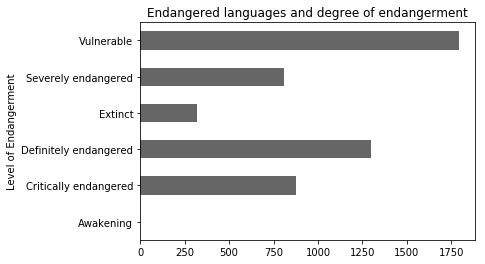

In [30]:
# create a bar plot for different degree of endangerment
plt.figure()
degree_bar = degree.plot.barh(x = 'Level of Endangerment', color='k', alpha=0.6)
plt.title('Endangered languages and degree of endangerment')
# Saving the bar plot as pdf file
# plt.savefig('degree_bar.pdf')

In [32]:
# replace degree of endangerment with numbers to study
# the correlation between degree of endangerment and number of speakers
mapping = {'Vulnerable': 1,
           'Definitely endangered': 2,
           'Severely endangered': 3,
           'Critically endangered': 4,
           'Extinct': 5,
           'Awakening': 0}
number = df.replace({'Level of Endangerment' : mapping})
number.head()

,Language,Level of Endangerment,Number of Speakers,Linguistic Family,Countries,Coordinates,Latitude,Longitude
0,Ã”rÃ´Ãª,2,590,Austronesian; Malayo-Polynesian; Oceanic; New ...,New Caledonia,"-21.4223,165.4678",-21.4223,165.4678
1,Abaga,4,5,Trans-New Guinea; Kainantu-Goroka,Papua New Guinea,"-6.1883,145.5976",-6.1883,145.5976
2,Abai Sungai,2,<500,Austronesian; Malayo-Polynesian; North Borneo;...,Malaysia,"5.587, 118.3695",5.5870,118.3695
3,Abau,1,">7,000",Sepik,Papua New Guinea,"-3.97, 141.32",-3.9700,141.32
4,Abaza,1,"47,880",Northwest Caucasian; Abkhaz-Abaza,Russia,"44.0,42.0",44.0000,42.0


In [33]:
# drop all null number of speakers
number = number[pd.notnull(df['Number of Speakers'])]
number.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5577 entries, 0 to 5762
Data columns (total 8 columns):
Language                 5577 non-null object
Level of Endangerment    5577 non-null int64
Number of Speakers       5577 non-null object
Linguistic Family        5577 non-null object
Countries                5577 non-null object
Coordinates              5577 non-null object
Latitude                 5577 non-null float64
Longitude                5577 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 392.1+ KB


In [39]:
# remove characters that are not number
number['Number of Speakers'] = number['Number of Speakers'].map(lambda x: x.lstrip('<>,~-?'))
number['Number of Speakers'] = number['Number of Speakers'].replace(',', '')
# convert Number of speakers to int
# number['Number of Speakers'] = number['Number of Speakers'].astype(int)
number[1:100]

,Language,Level of Endangerment,Number of Speakers,Linguistic Family,Countries,Coordinates,Latitude,Longitude
1,Abaga,4,5,Trans-New Guinea; Kainantu-Goroka,Papua New Guinea,"-6.1883,145.5976",-6.188300,145.5976
2,Abai Sungai,2,500,Austronesian; Malayo-Polynesian; North Borneo;...,Malaysia,"5.587, 118.3695",5.587000,118.3695
3,Abau,1,"7,000",Sepik,Papua New Guinea,"-3.97, 141.32",-3.970000,141.32
4,Abaza,1,"47,880",Northwest Caucasian; Abkhaz-Abaza,Russia,"44.0,42.0",44.000000,42.0
5,Abinomn,4,50,Isolate; Pacific,Indonesia,"-2.92, 138.89",-2.920000,138.89
6,Abom,4,15,Trans-New Guinea; Tirio,Papua New Guinea,"-8.424996376, 142.9303589",-8.424996,142.9303589
7,Abu,1,"2,347",Lower Sepik-Ramu; Ramu; Grass,Papua New Guinea,"-4.24, 144.47",-4.240000,144.47
8,Abu',1,"2,560",Torricelli; Arapeshan,Papua New Guinea,"-3.4, 142.8",-3.400000,142.8
9,Achagua,2,283,Arawakan; Northern Arawakan; Upper Amazon,Colombia,"4.41666666667,-72.25",4.416667,-72.25
10,AchÃ©,3,200,Tupian; Tupi-Guaranian; Guaranian,Paraguay,"-25.25,-55.1666666667",-25.250000,-55.1666666667


Text(0.5, 1.0, 'Correlation between Degree of Endangerment and Number of Speakers')

<Figure size 432x288 with 0 Axes>

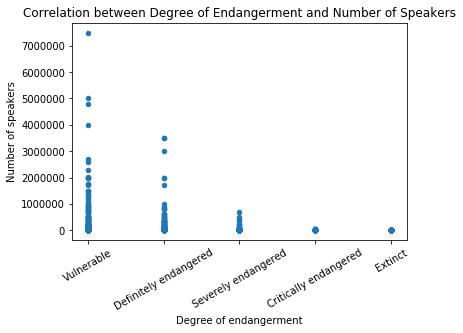

In [17]:
# scatter plot
plt.figure()
number_scatter = number.plot.scatter(x = 'Degree of endangerment', y = 'Number of speakers')
plt.xticks(np.arange(1, 6),('Vulnerable', 'Definitely endangered', 'Severely endangered', 'Critically endangered', 'Extinct'), rotation =30)
plt.title('Correlation between Degree of Endangerment and Number of Speakers')
# Saving the bar plot as pdf file
# plt.savefig('degree_number.pdf')